In [1]:
import pandas as pd
data = pd.read_csv('hospital.csv')
data.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
     

Here are some quick hints at interpreting the field names:

Your prediction target is readmitted

Columns with the word diag indicate the diagnostic code of the illness or illnesses the patient was admitted with. For example, diag_1_428 means the doctor said their first illness diagnosis is number "428". What illness does 428 correspond to? You could look it up in a codebook, but without more medical background it wouldn't mean anything to you anyway.

A column names like glimepiride_No mean the patient did not have the medicine glimepiride. If this feature had a value of False, then the patient did take the drug glimepiride

Features whose names begin with medical_specialty describe the specialty of the doctor seeing the patient. The values in these fields are all True or False.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = data.readmitted

base_features = [c for c in data.columns if c != "readmitted"]

X = data[base_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=30, random_state=1).fit(train_X, train_y)

In [3]:
from sklearn.inspection import permutation_importance
import numpy as np

results = permutation_importance(my_model, val_X, val_y, random_state=0)

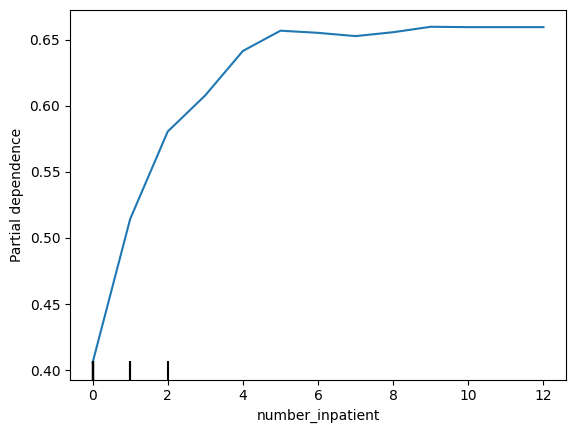

In [4]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

feature_name = 'number_inpatient'
PartialDependenceDisplay.from_estimator(my_model, val_X, [feature_name])
plt.show()

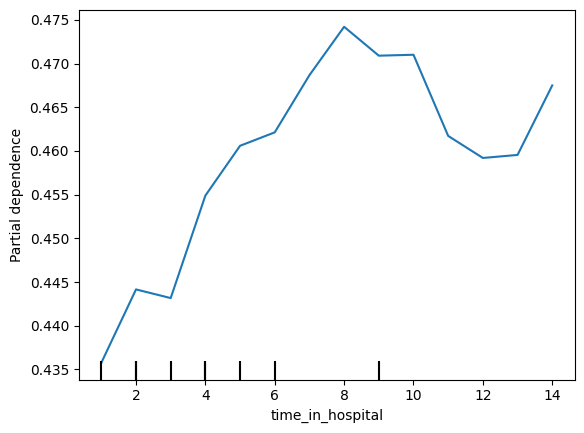

In [5]:
feature_name = 'time_in_hospital'
PartialDependenceDisplay.from_estimator(my_model, val_X, [feature_name])
plt.show()

It seems like time_in_hospital doesn't matter at all. The difference between the lowest value on the partial dependence plot and the highest value is about 5%.

If that is what your model concluded, the doctors will believe it. But it seems so low. Could the data be wrong, or is your model doing something more complex than they expect?

They'd like you to show them the raw readmission rate for each value of time_in_hospital to see how it compares to the partial dependence plot.

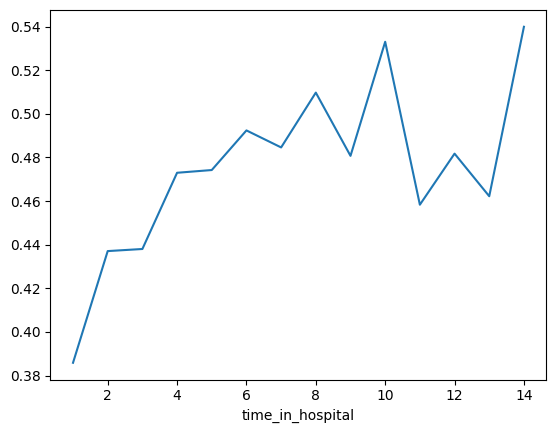

In [6]:
all_train = pd.concat([train_X, train_y], axis=1)

all_train.groupby(['time_in_hospital']).mean().readmitted.plot()
plt.show()

### Question 5

The hospital wants you to create a function patient_risk_factors that does the following

Takes a single row with patient data (of the same format you as your raw data)

Creates a visualization showing what features of that patient increased their risk of readmission, what features decreased it, and how much those features mattered.

It's not important to show every feature with every miniscule impact on the readmission risk. It's fine to focus on only the most important features for that patient.

In [16]:
row_to_show = 16
data_for_prediction = val_X.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
my_model.predict_proba(data_for_prediction_array)

/Users/Santiago/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.86666667, 0.13333333]])

In [17]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

![Alt text](shap.png)